Table of Contents

1. Import Libraries

2. Import Data

3. Create a Histogram of the 'order_hour_of_day' column

4. Create histogram for 'order_hour_of_day' column with less bins and export histogram

5. Create a Bar Chart for the 'loyalty_flag' column and export

6. Difference in Expenditure Depending on Time of Day

7. Create a line chart based on 'order_hour_of_day' and 'prices' and export

8. Create a Line chart based on Customers Demographics and export

9. Create a Scatterplot connecting Age and Income and export

10. Export Dataframe

1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Import Data

In [2]:
# Create path
path = '/Users/ianfleming/Desktop/05-2025 Instacart Basket Analysis'

In [3]:
# Import dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Check import
df_merged

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,13,1,12,7.0,False,14197,5,1,...,Diana,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both
32434485,2977660,206209,13,1,12,7.0,False,38730,6,0,...,Diana,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both
32434486,2977660,206209,13,1,12,7.0,False,31477,7,0,...,Diana,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both
32434487,2977660,206209,13,1,12,7.0,False,6567,8,0,...,Diana,Donovan,Female,Iowa,74,9/14/2019,3,married,137969,both


Question 3. Create a Histogram of the 'order_hour_of_day' Column

3. Create a Histogram of the 'order_hour_of_day' Column

<Axes: ylabel='Frequency'>

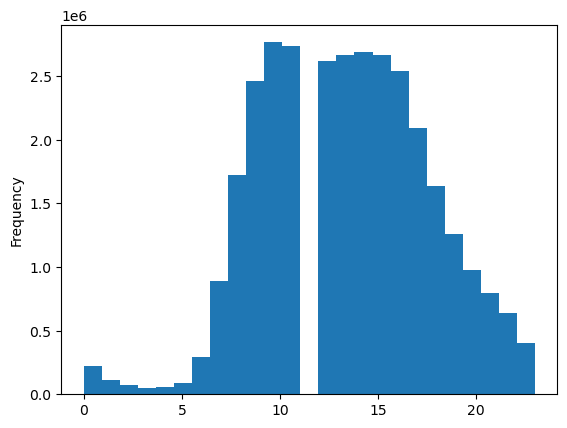

In [5]:
# Create histogram for 'order_hour_of_day' column
df_merged['order_hour_of_day'].plot.hist(bins = 25)

The histogram has a gap so I am checking for any missing hours. 

In [6]:
# Checking that missing hour
df_merged['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218948
1      115786
2       69434
3       51321
4       53283
5       88062
6      290795
7      891937
8     1719973
9     2456713
10    2764426
11    2738582
12    2620847
13    2663292
14    2691548
15    2664533
16    2537458
17    2089465
18    1637923
19    1259401
20     977038
21     796370
22     634734
23     402620
Name: count, dtype: int64

Since none of the hours our missing, through further investigation, I realised that it is because i wrote bins = 25 and there are of course only 24 hours in a day so I will recify it

4. Create histogram for 'order_hour_of_day' column with less bins and export histogram

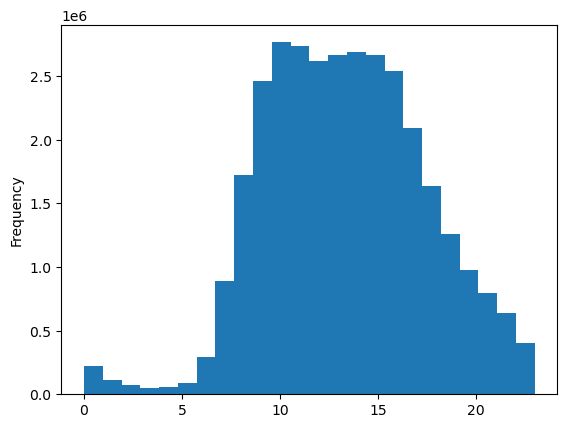

In [7]:
# Create histogram for 'order_hour_of_day' column
hist = df_merged['order_hour_of_day'].plot.hist(bins = 24)

The histograms shows customer orders for each hour throughout the 24 hour day. From the histogram, it is clear that most orders are placed between 9am and 4pm with a noticeable peak between 10am and 1pm. There are very few orders made during the night and in the early morning hours (between midnight and 6am). The lowest customer orders fall between 3am and 5am. 

In [8]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_order_hour_of_day.png'))

Question 4. Create a Bar Chart for the 'loyalty_flag' Column

5. Create a Bar Chart for the 'loyalty_flag' Column and export it

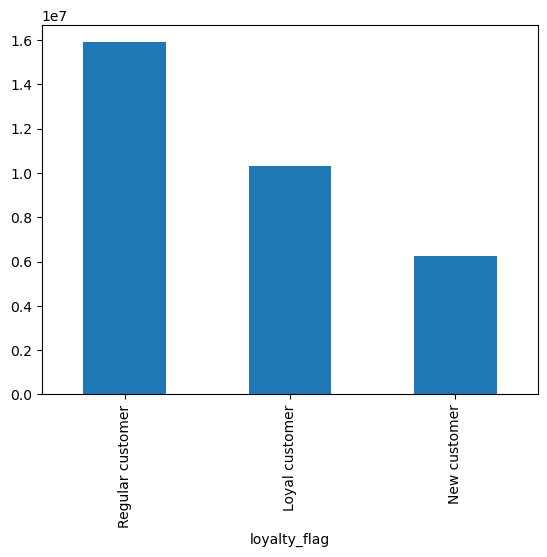

In [9]:
# Create bar chart for 'loyalty_flag' column
bar = df_merged['loyalty_flag'].value_counts().plot.bar()

In [10]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_flag.png'))

Question 5. Difference in Expenditure Depending on Time of Day

6. Difference in Expenditure Depending on Time of Day

In [11]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [12]:
# Store 70% of the data in the dataframe big
big = df_merged[dev]

In [13]:
# Store 30% of the data in the dataframe small
small = df_merged[~dev]

In [14]:
# Check dataframe size
len(df_merged)

32434489

In [15]:
# Check size of the two new datarames added together
len(big) + len(small)

32434489

In [16]:
# Reduce sample to columns needed 'order_hour_of_day' and 'prices'
df_2 = small[['order_hour_of_day','prices']]

7. Create a line chart based on 'order_hour_of_day' and 'prices' and export

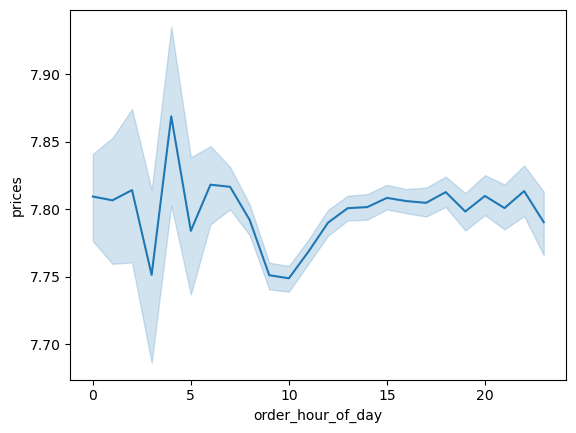

In [17]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The line chart shows the average customer spending at different times of day. Spending is highest in the early morning hours (around 2–4 am), which may reflect bulk or higher-value purchases made during quieter hours. After this peak, average spending drops sharply around 9–10 am — likely when most customers place more routine, lower-cost orders. From late morning through the evening, average expenditure remains relatively stable, suggesting consistent purchase behavior during normal shopping hours.

In [18]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_expenditure.png'))

Question 6. Customer Demographics

8. Create a Line chart based on Customers Demographics and export

In [19]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev_1 = np.random.rand(len(df_merged)) <= 0.7

In [20]:
# Store 70% of the data in the dataframe big
big_1 = df_merged[dev_1]

In [21]:
# Store 30% of the data in the dataframe small
small_1 = df_merged[~dev_1]

In [22]:
# Check size of the two new datarames added together
len(big_1) + len(small_1)

32434489

In [23]:
# Reduce sample to columns needed 'age' and 'n_dependents'
df_relevant_columns = small_1[['age','n_dependents']]

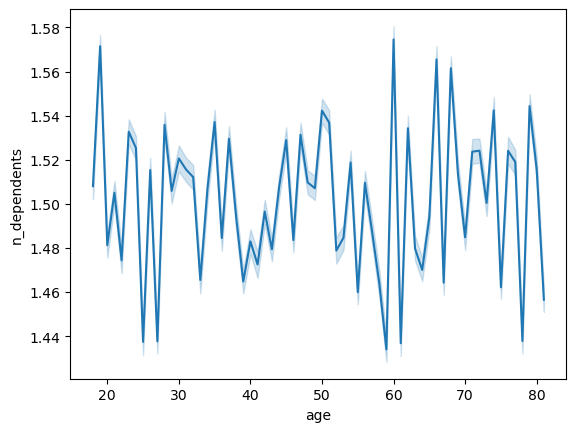

In [24]:
# Create a line chart
line_2 = sns.lineplot(data = df_relevant_columns, x = 'age',y = 'n_dependents')

The average number of dependents remains relatively consistent across all ages, with small fluctuations but no clear trend. This suggests that customers of different ages are similarly likely to have dependents.

In [25]:
# Export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_n_dependents.png'))

Question 7. Explore the Connection between Age and Spending Power (Income) with a Scatterplot

9. Create a Scatterplot connecting Age and Income and export

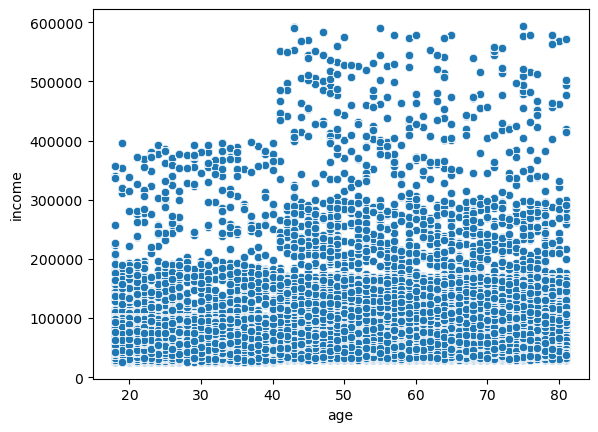

In [29]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_merged)

The scatterplot shows that income is widely distributed across all age groups, with no strong overall correlation between age and income. However, a clear pattern emerges at the highest income levels. It shows that only individuals aged 41 and above earn more than 400,000. This suggests that very high income is associated with older age. This could be due to seniority or experience.

In [30]:
# Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatter_age_income.png'))


10. Export Dataframe

In [31]:
# Export dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))